In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import pandas as pd

from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import math
import numpy as np
import pandas as pd

import cv2
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/facial_expression/

/content/drive/MyDrive/facial_expression


In [ ]:
!ls

best_model.h5		   epoch_history_dcnn.png  fer2013.tar.gz
confusion_matrix_dcnn.png  fer2013


In [ ]:
import tarfile

fname = 'fer2013.tar.gz'

if fname.endswith('tar.gz'):
   tar = tarfile.open(fname, 'r:gz')
   tar.extractall()
   tar.close()
elif fname.endswith('tar'):
    tar = tarfile.open(fname,'r:')
    tar.extractall()
    tar.close()

In [ ]:
df = pd.read_csv('fer2013/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
#checking target labels
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = df['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Fear,5121
2,Sad,6077
3,Neutral,6198
4,Happy,8989
5,Surprise,4002
6,Digust,547


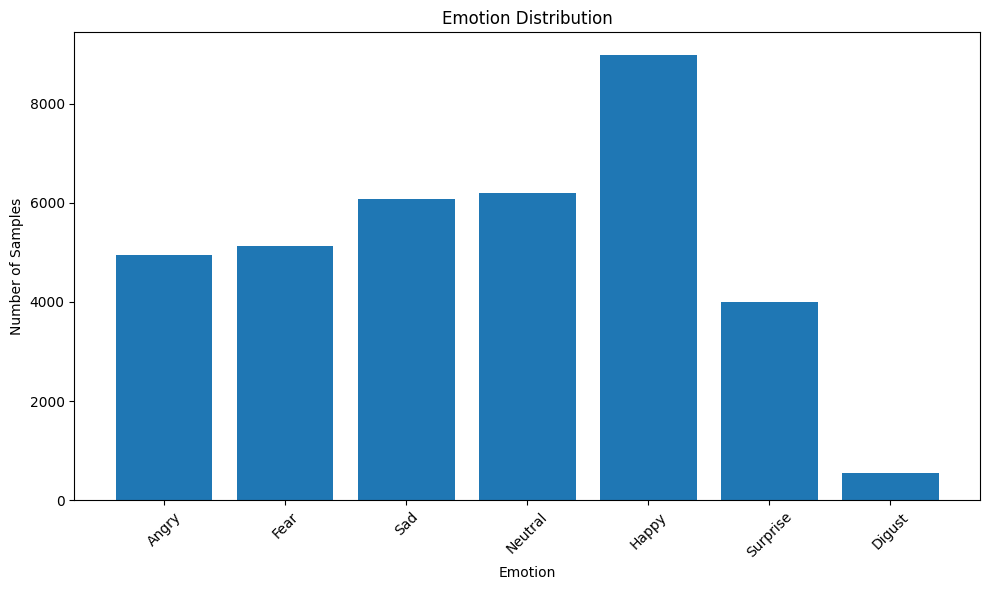

In [ ]:
#Creating a bar chart to display each emotions
import matplotlib.pyplot as plt




plt.figure(figsize=(10, 6))  # Set the figure size


plt.bar(emotion_counts['emotion'], emotion_counts['number'])


plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.title('Emotion Distribution')


plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-22-2c0082511be1>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([image.astype(np.uint8), emotion])


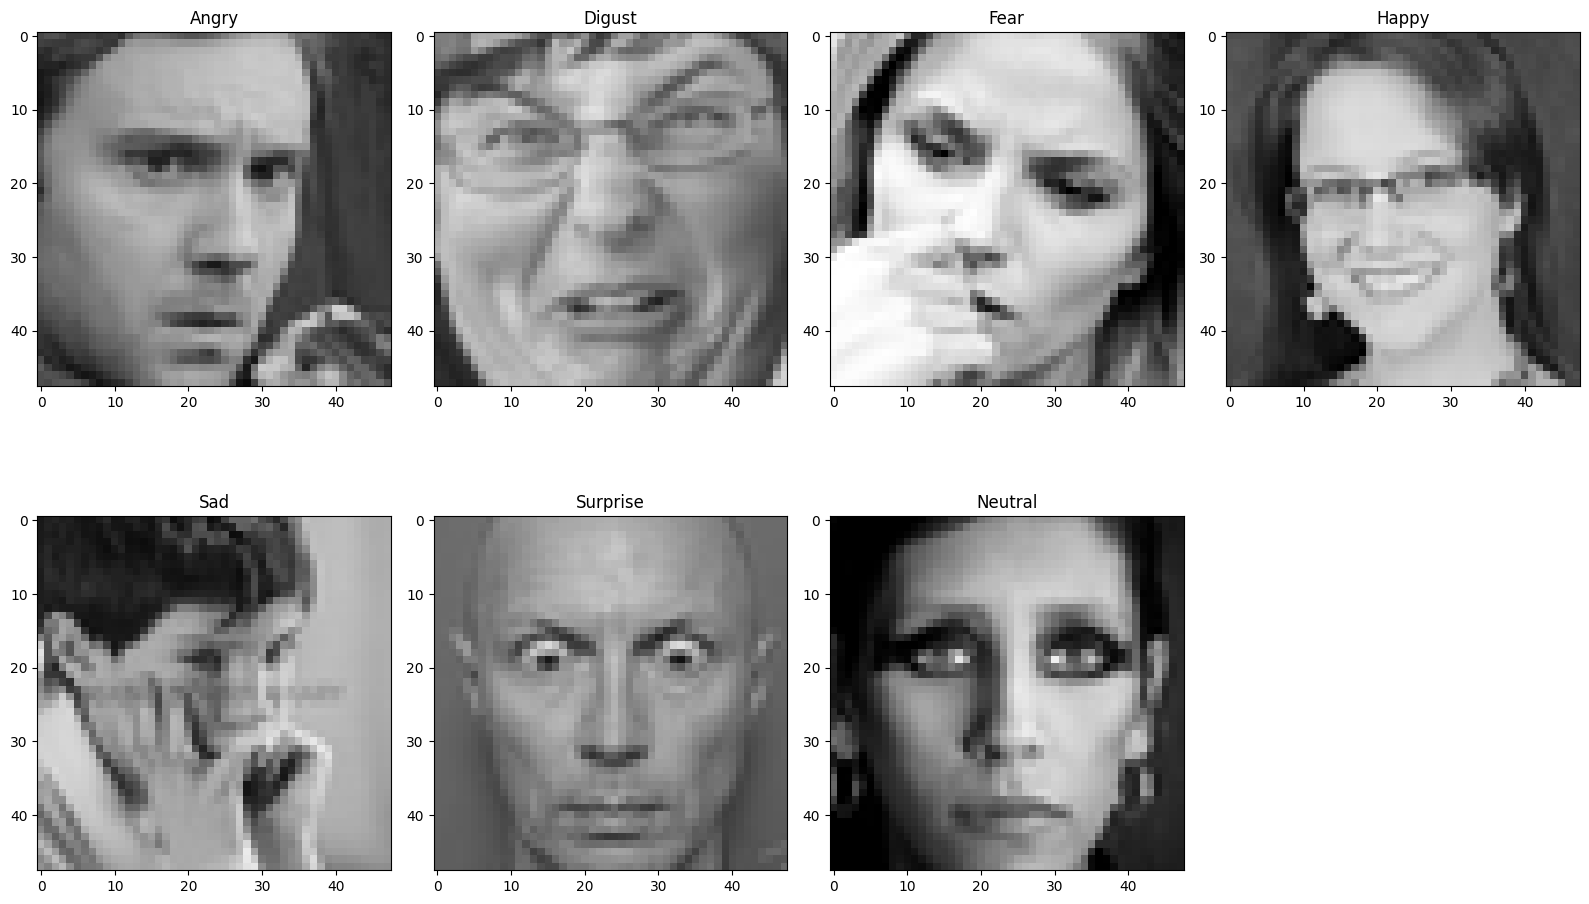

In [ ]:
### visualizing images associated with seven different emotions by using the function row2image to format the image data and emotion labels.

import numpy as np
import matplotlib.pyplot as plt

def row2image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split())
    img = img.reshape(48, 48)
    image = np.stack([img] * 3, axis=-1)  
    return np.array([image.astype(np.uint8), emotion])

plt.figure(figsize=(16, 10))

for i in range(1, 8):
    face = df[df['emotion'] == i - 1].iloc[0]
    img = row2image(face)
    plt.subplot(2, 4, i)
    plt.imshow(img[0], cmap='gray')  
    plt.title(img[1])

plt.tight_layout()
plt.show()


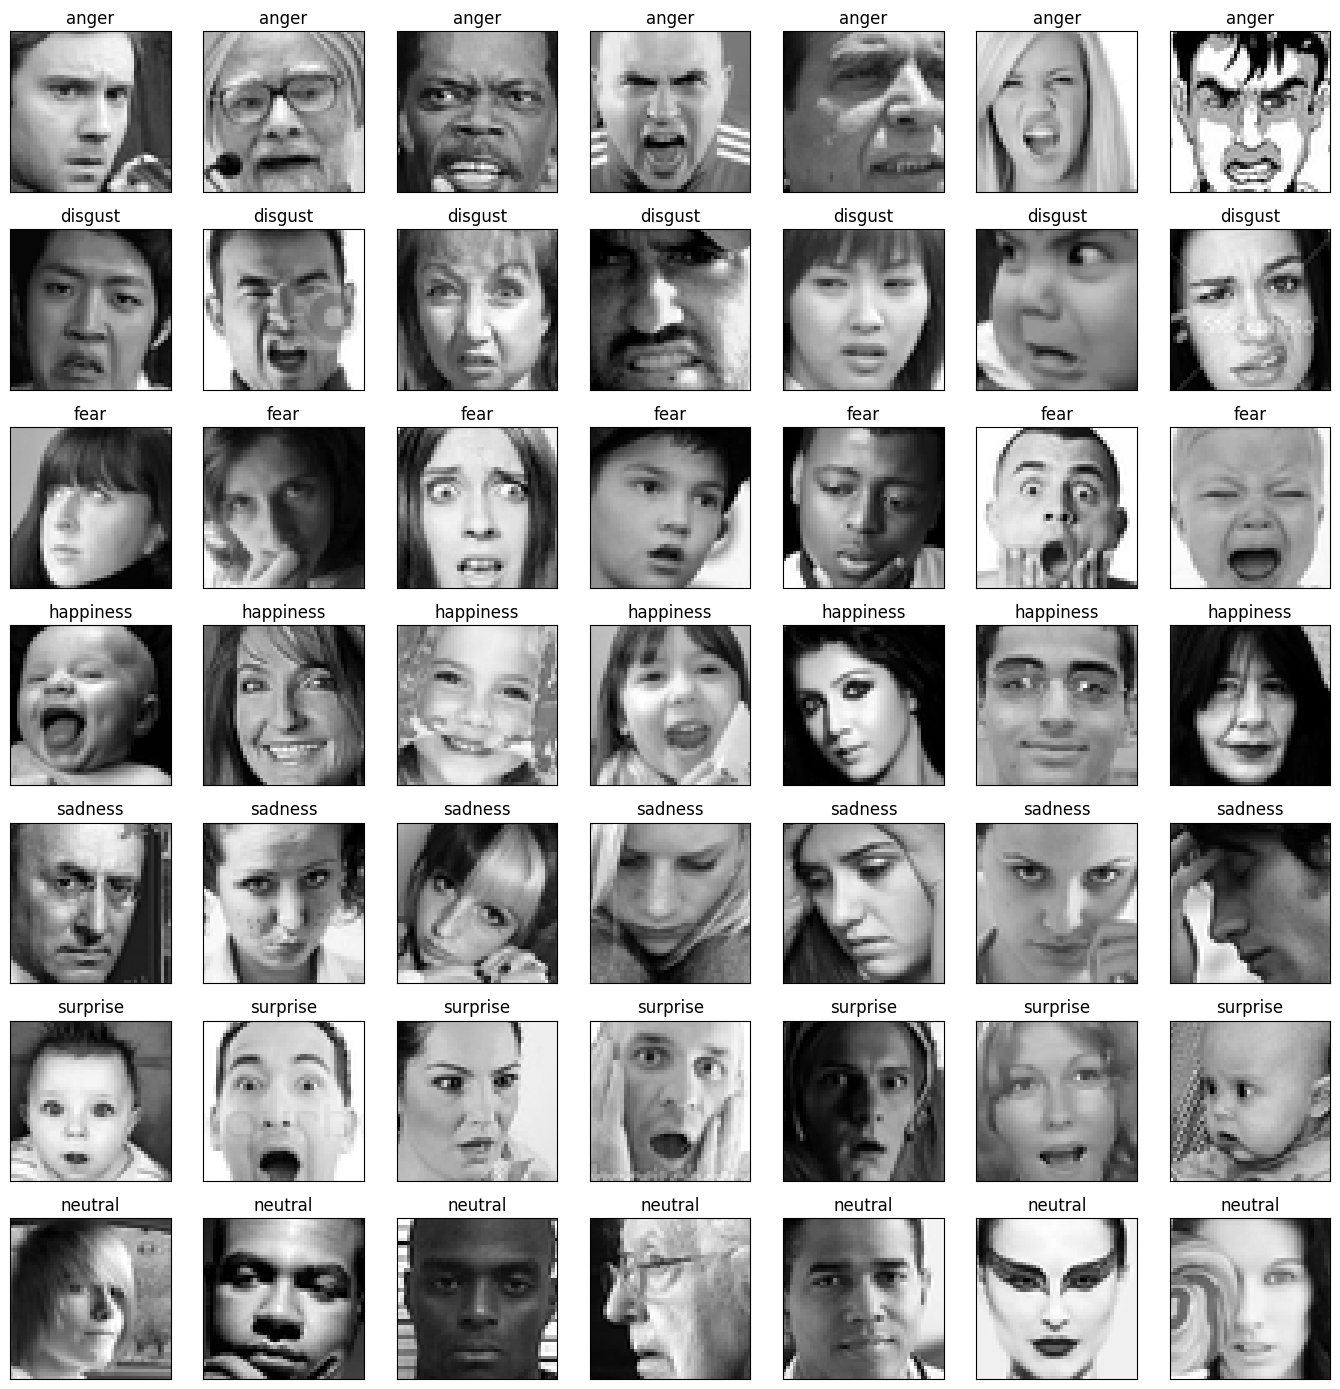

In [ ]:
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap = 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()


### DATA PREPROCESSING

In [ ]:
#import numpy as np
#import pandas as pd



img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))


img_array = np.stack(img_array, axis=0)


In [ ]:
img_array.shape

(35887, 48, 48)

In [ ]:
import numpy as np
import cv2


img_features = []


for i in range(len(img_array)):

    temp = cv2.cvtColor(img_array[i], cv2.COLOR_GRAY2RGB)
    img_features.append(temp)


img_features = np.array(img_features)


print(img_features.shape)


(35887, 48, 48, 3)


In [ ]:
le = LabelEncoder()

img_labels = le.fit_transform(df.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(35887, 7)

In [ ]:
from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()

img_labels = le.fit_transform(df.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [ ]:
#Splitting the data into training and validation set.
X_train, X_valid, y_train, y_valid = train_test_split(img_features,
                                                      img_labels,
                                                      shuffle = True,
                                                      stratify = img_labels,
                                                      test_size = 0.1,
                                                      random_state = 42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((32298, 48, 48, 3), (3589, 48, 48, 3), (32298, 7), (3589, 7))

In [ ]:
del df
del img_features
del img_labels
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [ ]:

# Scale the pixel values of the training dataset to the range [0, 1]
X_train = X_train / 255.0

# Scale the pixel values of the validation dataset to the range [0, 1]
X_valid = X_valid / 255.0


**BUILDING** THE FIRST CNN MODEL

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

In [ ]:
model.compile(
    optimizer = Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Defining an EarlyStopping callback
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               min_delta = 0.00005,
                               patience = 11,
                               verbose = 1,
                               restore_best_weights = True,)
#Defining Learning Rate Scheduler callback
lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 factor = 0.5,
                                 patience = 7,
                                 min_lr = 1e-7,
                                 verbose = 1,)
#combining the call back into a list
callbacks = [early_stopping,lr_scheduler,]

In [ ]:
# Applying data augmentation to the training dataset
train_datagen = ImageDataGenerator(rotation_range = 15,
                                   width_shift_range = 0.15,
                                   height_shift_range = 0.15,
                                   shear_range = 0.15,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,)
train_datagen.fit(X_train)
batch_size = 64
epochs = 30
optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

#compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = optims[0],
              metrics = ['accuracy'])
history = model.fit(train_datagen.flow(X_train,
                                       y_train,
                                       batch_size = batch_size),
                                       validation_data = (X_valid, y_valid),
                                       steps_per_epoch = len(X_train) / batch_size,
                                       epochs = epochs,
                                       callbacks = callbacks,
                                       use_multiprocessing = True)

Epoch 1/30
504/504 [==============================] - 66s 108ms/step - loss: 1.8295 - accuracy: 0.2415 - val_loss: 1.7835 - val_accuracy: 0.2686 - lr: 1.0000e-04
Epoch 2/30
504/504 [==============================] - 56s 110ms/step - loss: 1.7902 - accuracy: 0.2617 - val_loss: 1.7220 - val_accuracy: 0.2875 - lr: 1.0000e-04
Epoch 3/30
504/504 [==============================] - 57s 113ms/step - loss: 1.7569 - accuracy: 0.2810 - val_loss: 1.6786 - val_accuracy: 0.3307 - lr: 1.0000e-04
Epoch 4/30
504/504 [==============================] - 58s 114ms/step - loss: 1.7311 - accuracy: 0.2996 - val_loss: 1.6421 - val_accuracy: 0.3600 - lr: 1.0000e-04
Epoch 5/30
504/504 [==============================] - 58s 116ms/step - loss: 1.7065 - accuracy: 0.3158 - val_loss: 1.5906 - val_accuracy: 0.3764 - lr: 1.0000e-04
Epoch 6/30
504/504 [==============================] - 56s 110ms/step - loss: 1.6796 - accuracy: 0.3327 - val_loss: 1.5775 - val_accuracy: 0.3812 - lr: 1.0000e-04
Epoch 7/30
504/504 [========

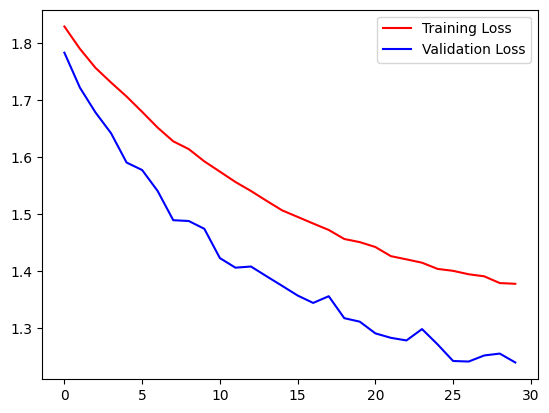

In [ ]:
#PLOTTING THE TRAINING AND VALIDATION LOSS
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

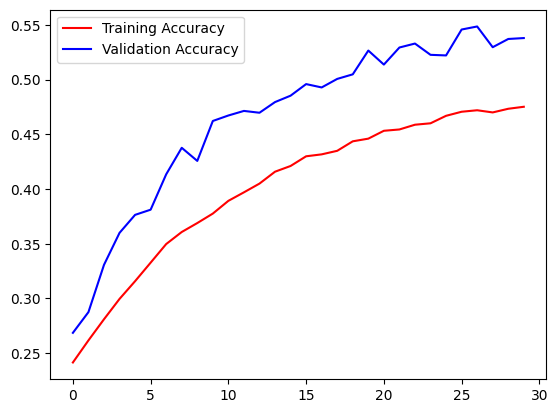

In [ ]:
#plotting the training accuracy and validation accuracy
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [ ]:
#import scikitplot as skplt
!pip install scikit-plot
import scikitplot as skplt

113/113 [==============================] - 0s 2ms/step
total wrong validation predictions: 1658


              precision    recall  f1-score   support

           0       0.41      0.52      0.45       495
           1       0.00      0.00      0.00        55
           2       0.37      0.17      0.24       512
           3       0.78      0.77      0.78       899
           4       0.51      0.27      0.35       608
           5       0.58      0.74      0.65       400
           6       0.43      0.70      0.54       620

    accuracy                           0.54      3589
   macro avg       0.44      0.45      0.43      3589
weighted avg       0.53      0.54      0.52      3589



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


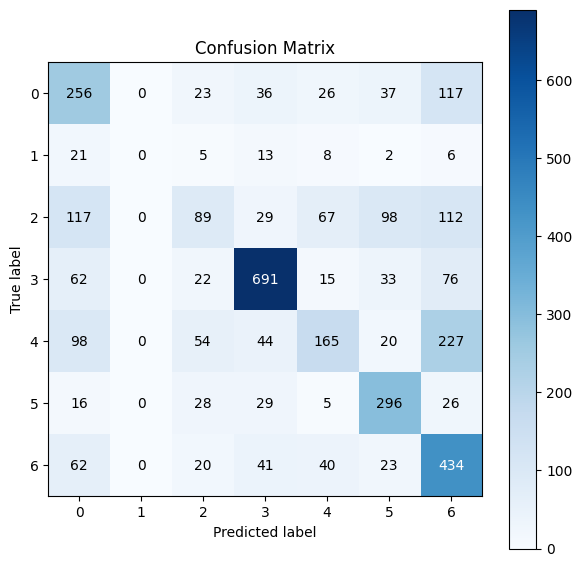

In [ ]:
import scikitplot
from matplotlib import pyplot
yhat_valid = np.argmax(model.predict(X_valid), axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))

BUILDING THE SECOND MODEL

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               min_delta = 0.00005,
                               patience = 11,
                               verbose = 1,
                               restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 factor = 0.5,
                                 patience = 7,
                                 min_lr = 1e-7,
                                 verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

# Defining data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
)



# Applying data augmentation to the training data
train_datagen.fit(X_train)

# Define batch size and number of epochs=25,batch size 32
batch_size = 32  
epochs = 25

# Defining optimizer
optimizer = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)

# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) // batch_size,  
    epochs=epochs,
    callbacks=callbacks,  
    use_multiprocessing=True
)


Epoch 1/25
1009/1009 [==============================] - 73s 70ms/step - loss: 1.8281 - accuracy: 0.2379 - val_loss: 1.7709 - val_accuracy: 0.2672 - lr: 1.0000e-04
Epoch 2/25
1009/1009 [==============================] - 66s 65ms/step - loss: 1.7777 - accuracy: 0.2688 - val_loss: 1.7113 - val_accuracy: 0.3383 - lr: 1.0000e-04
Epoch 3/25
1009/1009 [==============================] - 63s 62ms/step - loss: 1.7363 - accuracy: 0.2982 - val_loss: 1.6419 - val_accuracy: 0.3803 - lr: 1.0000e-04
Epoch 4/25
1009/1009 [==============================] - 65s 64ms/step - loss: 1.7019 - accuracy: 0.3200 - val_loss: 1.5884 - val_accuracy: 0.3856 - lr: 1.0000e-04
Epoch 5/25
1009/1009 [==============================] - 64s 64ms/step - loss: 1.6688 - accuracy: 0.3375 - val_loss: 1.5626 - val_accuracy: 0.4090 - lr: 1.0000e-04
Epoch 6/25
1009/1009 [==============================] - 64s 63ms/step - loss: 1.6350 - accuracy: 0.3567 - val_loss: 1.5037 - val_accuracy: 0.4369 - lr: 1.0000e-04
Epoch 7/25
1009/1009 [

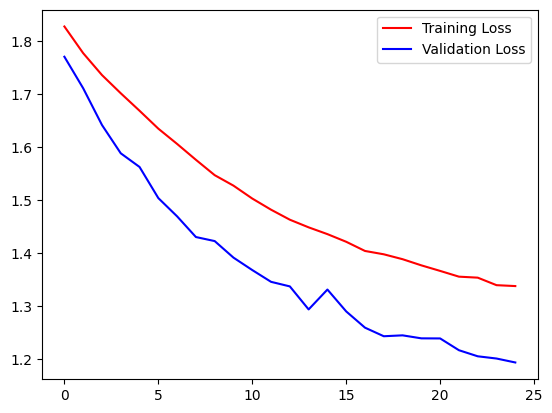

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

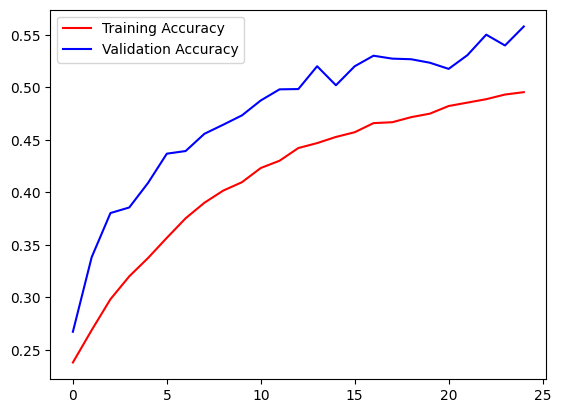

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

113/113 [==============================] - 0s 2ms/step
total wrong validation predictions: 1586


              precision    recall  f1-score   support

           0       0.44      0.54      0.48       495
           1       1.00      0.02      0.04        55
           2       0.35      0.28      0.31       512
           3       0.80      0.76      0.78       899
           4       0.47      0.40      0.44       608
           5       0.65      0.69      0.67       400
           6       0.50      0.62      0.56       620

    accuracy                           0.56      3589
   macro avg       0.60      0.47      0.47      3589
weighted avg       0.57      0.56      0.55      3589



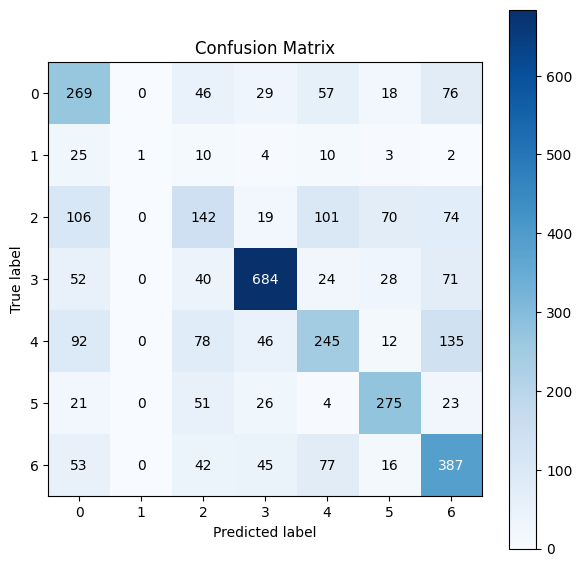

In [ ]:
import scikitplot
from matplotlib import pyplot
yhat_valid = np.argmax(model.predict(X_valid), axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))

USING TRANSFER LEARNING VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Creating a Sequential model
model = Sequential()

# Adding the initial Convolutional and Pooling layers
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Adding more Convolutional and Pooling layers
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer for multi-class classification
model.add(Dense(7, activation='softmax'))

# Compiling the model
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
#using early stopping 
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               min_delta = 0.00005,
                               patience = 11,
                               verbose = 1,
                               restore_best_weights = True,)
#
lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 factor = 0.5,
                                 patience = 7,
                                 min_lr = 1e-7,
                                 verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

In [ ]:
train_datagen = ImageDataGenerator(rotation_range = 15,
                                   width_shift_range = 0.15,
                                   height_shift_range = 0.15,
                                   shear_range = 0.15,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,)
train_datagen.fit(X_train)

In [ ]:
vgg = tf.keras.applications.VGG19(weights = 'imagenet',
                                  include_top = False,
                                  input_shape = (48, 48, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
def build_model(bottom_model, classes):
    model = bottom_model.layers[-2].output
    model = GlobalAveragePooling2D()(model)
    model = Dense(classes, activation = 'softmax', name = 'out_layer')(model)

    return model

In [ ]:
head = build_model(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               min_delta = 0.00005,
                               patience = 11,
                               verbose = 1,
                               restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 factor = 0.5,
                                 patience = 7,
                                 min_lr = 1e-7,
                                 verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

In [ ]:
train_datagen = ImageDataGenerator(rotation_range = 15,
                                   width_shift_range = 0.15,
                                   height_shift_range = 0.15,
                                   shear_range = 0.15,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,)
train_datagen.fit(X_train)

In [ ]:

batch_size = 32
epochs = 25
optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
              optimizer = optims[0],
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_datagen.flow(X_train,
                                       y_train,
                                       batch_size = batch_size),
                                       validation_data = (X_valid, y_valid),
                                       steps_per_epoch = len(X_train) / batch_size,
                                       epochs = epochs,
                                       callbacks = callbacks,
                                       use_multiprocessing = True)

Epoch 1/25
1009/1009 [==============================] - 68s 58ms/step - loss: 1.4510 - accuracy: 0.4315 - val_loss: 1.2390 - val_accuracy: 0.5208 - lr: 1.0000e-04
Epoch 2/25
1009/1009 [==============================] - 57s 57ms/step - loss: 1.2266 - accuracy: 0.5338 - val_loss: 1.0888 - val_accuracy: 0.5915 - lr: 1.0000e-04
Epoch 3/25
1009/1009 [==============================] - 59s 58ms/step - loss: 1.1421 - accuracy: 0.5688 - val_loss: 1.1101 - val_accuracy: 0.5846 - lr: 1.0000e-04
Epoch 4/25
1009/1009 [==============================] - 58s 57ms/step - loss: 1.0912 - accuracy: 0.5888 - val_loss: 1.0384 - val_accuracy: 0.6141 - lr: 1.0000e-04
Epoch 5/25
1009/1009 [==============================] - 60s 59ms/step - loss: 1.0407 - accuracy: 0.6111 - val_loss: 1.0796 - val_accuracy: 0.5985 - lr: 1.0000e-04
Epoch 6/25
1009/1009 [==============================] - 58s 57ms/step - loss: 1.0078 - accuracy: 0.6247 - val_loss: 0.9935 - val_accuracy: 0.6291 - lr: 1.0000e-04
Epoch 7/25
1009/1009 [

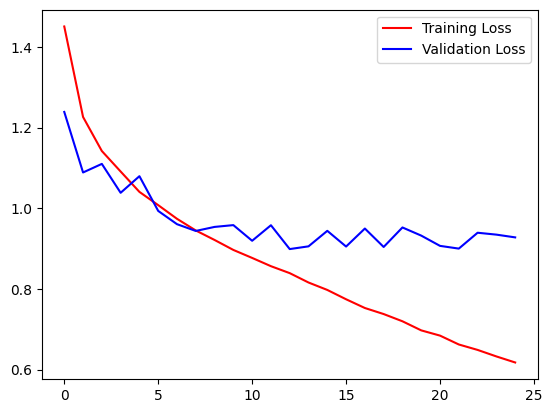

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

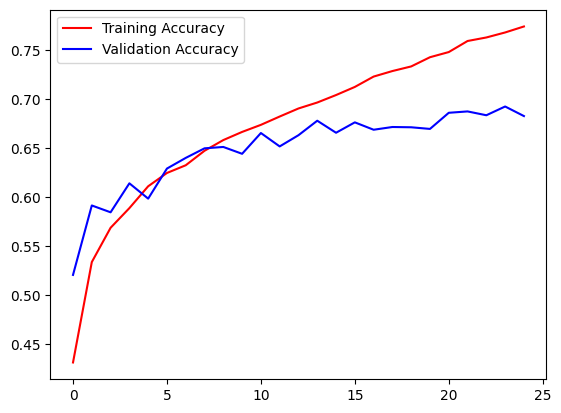

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

113/113 [==============================] - 2s 14ms/step
total wrong validation predictions: 1139


              precision    recall  f1-score   support

           0       0.60      0.65      0.62       495
           1       0.71      0.65      0.68        55
           2       0.60      0.44      0.51       512
           3       0.87      0.87      0.87       899
           4       0.55      0.58      0.56       608
           5       0.84      0.72      0.77       400
           6       0.59      0.72      0.65       620

    accuracy                           0.68      3589
   macro avg       0.68      0.66      0.67      3589
weighted avg       0.69      0.68      0.68      3589



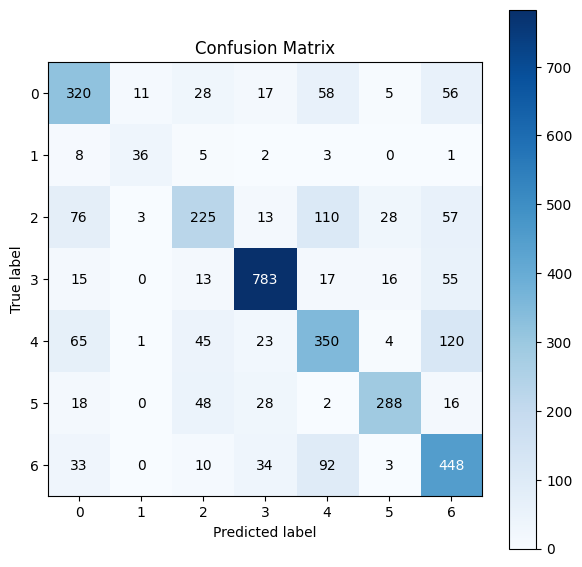

In [ ]:
import scikitplot
from matplotlib import pyplot
yhat_valid = np.argmax(model.predict(X_valid), axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))

USING TRANSFER LEARNING MOBILE NET

In [ ]:
Mnet = tf.keras.applications.MobileNet(weights = 'imagenet',
                                  include_top = False,
                                  input_shape = (48, 48, 3))

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
Mnet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                         

In [ ]:
def build_model(bottom_model, classes):
    model = bottom_model.layers[-2].output
    model = GlobalAveragePooling2D()(model)
    model = Dense(classes, activation = 'softmax', name = 'out_layer')(model)

    return model

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                               min_delta = 0.00005,
                               patience = 11,
                               verbose = 1,
                               restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 factor = 0.5,
                                 patience = 7,
                                 min_lr = 1e-7,
                                 verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

In [ ]:
train_datagen = ImageDataGenerator(rotation_range = 15,
                                   width_shift_range = 0.15,
                                   height_shift_range = 0.15,
                                   shear_range = 0.15,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,)
train_datagen.fit(X_train)

In [ ]:

batch_size = 64
epochs = 20
optims = [optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999),]

model.compile(loss = 'categorical_crossentropy',
              optimizer = optims[0],
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_datagen.flow(X_train,
                                       y_train,
                                       batch_size = batch_size),
                                       validation_data = (X_valid, y_valid),
                                       steps_per_epoch = len(X_train) / batch_size,
                                       epochs = epochs,
                                       callbacks = callbacks,
                                       use_multiprocessing = True)

Epoch 1/20
504/504 [==============================] - 70s 122ms/step - loss: 0.5534 - accuracy: 0.7970 - val_loss: 0.9949 - val_accuracy: 0.6801 - lr: 1.0000e-04
Epoch 2/20
504/504 [==============================] - 67s 133ms/step - loss: 0.5308 - accuracy: 0.8079 - val_loss: 0.9685 - val_accuracy: 0.6846 - lr: 1.0000e-04
Epoch 3/20
504/504 [==============================] - 67s 132ms/step - loss: 0.5112 - accuracy: 0.8147 - val_loss: 1.0353 - val_accuracy: 0.6851 - lr: 1.0000e-04
Epoch 4/20
504/504 [==============================] - 64s 127ms/step - loss: 0.5004 - accuracy: 0.8189 - val_loss: 0.9908 - val_accuracy: 0.6921 - lr: 1.0000e-04
Epoch 5/20
504/504 [==============================] - 67s 133ms/step - loss: 0.4774 - accuracy: 0.8257 - val_loss: 1.0244 - val_accuracy: 0.6849 - lr: 1.0000e-04
Epoch 6/20
504/504 [==============================] - 66s 131ms/step - loss: 0.4645 - accuracy: 0.8318 - val_loss: 1.0152 - val_accuracy: 0.6946 - lr: 1.0000e-04
Epoch 7/20
504/504 [========

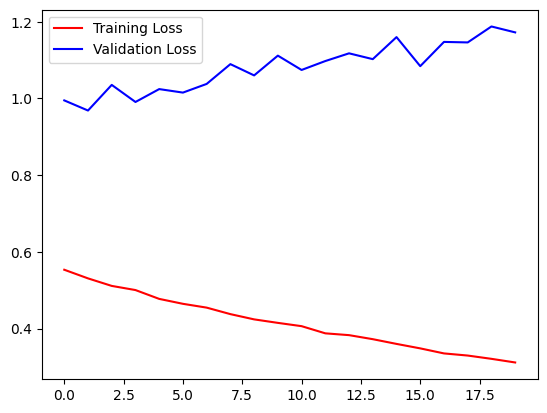

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

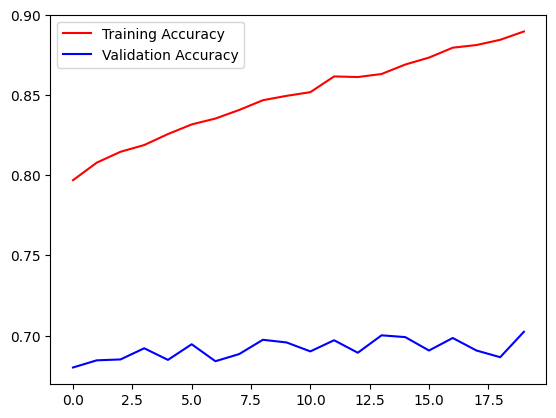

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

113/113 [==============================] - 2s 14ms/step
total wrong validation predictions: 1068


              precision    recall  f1-score   support

           0       0.62      0.69      0.65       495
           1       0.71      0.62      0.66        55
           2       0.59      0.56      0.58       512
           3       0.88      0.86      0.87       899
           4       0.61      0.52      0.56       608
           5       0.84      0.78      0.80       400
           6       0.62      0.74      0.68       620

    accuracy                           0.70      3589
   macro avg       0.70      0.68      0.69      3589
weighted avg       0.71      0.70      0.70      3589



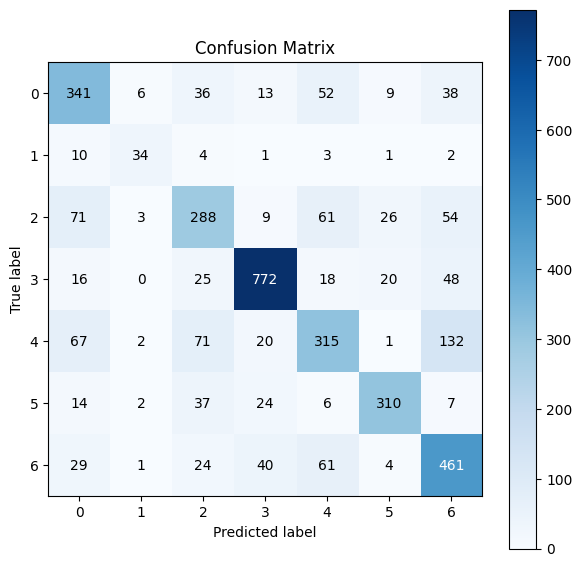

In [ ]:
import scikitplot
from matplotlib import pyplot
yhat_valid = np.argmax(model.predict(X_valid), axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))